# 🔍 Enricher for TTD Newsletter

This notebook is used to find, test, and evaluate enriching methods over articles.

In [1]:
import sys
import os
sys.path.append('../')
from ttd.storage.ttd_storage import TTDStorage
from dotenv import load_dotenv
from ttd.config import load_config
from ttd.scraper.utils import extract_domain
from pprint import pprint
from pathlib import Path
from collections import Counter


load_dotenv()
OPEN_ROUTER_API_KEY = os.getenv("OPEN_ROUTER_API_KEY")
config = load_config()
DB_PATH = '../' + config["db_path"]

In [2]:
# load storage and articles
storage = TTDStorage(DB_PATH)
articles = storage.get_all("articles")

## Scraped articles analysis

In [7]:
len(articles)

1199

In [72]:
articles[-1]

{'title': 'Detecting walking speed with wireless signals',
 'author': 'Anonymous',
 'published_date': 'Mon, 01 May 2017 14:25:29 +0000',
 'url_domain': 'csail.mit.edu',
 'url': 'https://www.csail.mit.edu/news/detecting-walking-speed-wireless-signals',
 'summary': 'Detecting walking speed with wireless signals Anonymous (not verified) Mon, 05/01/2017 - 10:25 \nVideo\nMay 01 \'17\nAdam Conner-Simons | Rachel Gordon\nWe’ve long known that blood pressure, breathing, body temperature and pulse provide an important window into the complexities of human health. But a growing body of research suggests that another vital sign – how fast you walk – could be a better predictor of health issues like cognitive decline, falls, and even certain cardiac or pulmonary diseases.\nWe’ve long known that blood pressure, breathing, body temperature and pulse provide an important window into the complexities of human health. But a growing body of research suggests that another vital sign –how fast you walk –c

In [125]:
pprint(storage.get_input_from_article(articles[-1], "text_content"))

('We’re excited to announce Anyscale RayTurbo costs by up to 6x compared to '
 'repurposed online inference providers such AWS Bedrock and OpenAI\n'
 'RayTurbo is focused on 4 broad workloads in the AI development lifecycle, '
 'where each of these workloads have different characteristics and require '
 'tailored optimizations.\n'
 'Data processing workloads: Modern AI workloads tend to interact with '
 'significant amounts of unstructured data. Similar to other data processing '
 'systems, these workloads tend to stress the underlying system’s memory '
 'management, fault tolerance, and scalability capabilities. However, unlike '
 'other data processing systems, AI workloads tend to require high utilization '
 'of both CPU and GPU resources and heavily interact with numerical data types '
 'like arrays and tensors.\n'
 'Ray Data such AWS Bedrock and OpenAI, without requiring high-end hardware '
 'like A100s or H100s.\n'
 'Feature | Description \n'
 '---|--- \n'
 'Fault Tolerance | Ena

In [73]:
def print_domain_matches(rss_file_path: Path, domain_counts: Counter, label: str = ""):
    print(f"\n📄 Checking {label or rss_file_path.name}:")
    with rss_file_path.open("r") as file:
        for line in file:
            url = line.strip()
            if not url:
                continue
            domain = extract_domain(url)
            count = domain_counts.get(domain, 0)
            if count > 0:
                print(f"[✅] Found: {domain} ({count} article(s))")
            else:
                print(f"[❌] Not found: {domain}")

# Step 1: Count article domains
domains = [article['url_domain'] for article in articles if article.get('url_domain')]
domain_counts = Counter(domains)
print("There are", len(domain_counts), "non-empty domains.")

# Step 2: Paths to RSS files
rss_files = {
    "Regular RSS Feeds": Path("../data/rss_feeds.txt"),
    "Stealth RSS Feeds": Path("../data/rss_feeds_stealth.txt")
}

# Step 3: Check both files
for label, path in rss_files.items():
    print_domain_matches(path, domain_counts, label=label)

There are 31 non-empty domains.

📄 Checking Regular RSS Feeds:
[✅] Found: aws.amazon.com (51 article(s))
[✅] Found: quantamagazine.org (5 article(s))
[✅] Found: eugeneyan.com (194 article(s))
[✅] Found: huyenchip.com (10 article(s))
[✅] Found: marktechpost.com (9 article(s))
[✅] Found: theverge.com (10 article(s))
[✅] Found: techcrunch.com (19 article(s))
[✅] Found: arstechnica.com (20 article(s))
[✅] Found: theguardian.com (132 article(s))
[✅] Found: zdnet.com (17 article(s))
[✅] Found: siliconangle.com (30 article(s))
[✅] Found: analyticsindiamag.com (30 article(s))
[✅] Found: venturebeat.com (28 article(s))
[✅] Found: blogs.nvidia.com (18 article(s))
[✅] Found: dagster.io (210 article(s))
[✅] Found: philschmid.de (157 article(s))
[✅] Found: thegradient.pub (15 article(s))
[✅] Found: towardsdatascience.com (9 article(s))
[✅] Found: thenextweb.com (10 article(s))
[✅] Found: syncedreview.com (10 article(s))
[✅] Found: techrepublic.com (20 article(s))
[✅] Found: pyimagesearch.com (9 art

In [74]:
from collections import Counter

def print_field_coverage(articles):
    total = len(articles)
    if total == 0:
        print("No articles to process.")
        return

    field_counts = Counter()

    for article in articles:
        for field, value in article.items():
            if value not in (None, '', [], {}):
                field_counts[field] += 1

    print(f"\n📊 Field Coverage Report ({total} articles):\n")
    for field in sorted(field_counts):
        count = field_counts[field]
        percent = (count / total) * 100
        print(f"{field:20} : {count:4} / {total} ({percent:.1f}%)")

# Example usage
print_field_coverage(articles)


📊 Field Coverage Report (1199 articles):

author               :  588 / 1199 (49.0%)
created_at           : 1199 / 1199 (100.0%)
execution_time       : 1199 / 1199 (100.0%)
html_content_length  : 1199 / 1199 (100.0%)
html_content_path    : 1199 / 1199 (100.0%)
published_date       : 1199 / 1199 (100.0%)
summary              : 1182 / 1199 (98.6%)
summary_length       : 1199 / 1199 (100.0%)
summary_text_ratio   : 1199 / 1199 (100.0%)
tags                 :  561 / 1199 (46.8%)
text_content_length  : 1199 / 1199 (100.0%)
text_content_path    : 1199 / 1199 (100.0%)
title                : 1199 / 1199 (100.0%)
url                  : 1199 / 1199 (100.0%)
url_domain           : 1199 / 1199 (100.0%)


## Model Lifecycle

In [ ]:
# test model lifecycle
SUMMARY_PROMPT = '''You are a professional summarizer in an automated newsletter system.

Your task is to summarize the following article in **fewer than 250 words**. The summary must be **as concise and information-dense as possible**, while preserving all **essential facts, arguments, conclusions, and relevant keywords**.

Avoid: redundancy, filler phrases, vague language, or speculative commentary.  
Do: use clear, direct language and complete sentences. Maintain a **neutral and factual tone**.

ARTICLE: """
{text_content}
"""
'''
model = {
    "name": "deepseek-r1-distill-qwen-32b:free",
    "version": "2025-01-29",
    "input_format": "text_content",
    "output_format": "summary",
    "config": {
        "openai": {
            "base_url": "https://openrouter.ai/api/v1",
            "model": "deepseek/deepseek-r1-distill-qwen-32b:free",
            "api_key_env_var": "OPEN_ROUTER_API_KEY",
            "template": SUMMARY_PROMPT,
            "temperature": 0,
            "max_tokens": 1000,
            "n": 1
        }
    }
}
storage.save_model(model)

In [24]:
model_dict = storage.get_model_by_name("deepseek-r1-distill-qwen-32b:free")
model_dict["config"]["openai"]["model"] = "deepseek/deepseek-r1-distill-qwen-32b:free"
model_dict["input_format"] = "text_content"
model_dict["max_tokens"] = 1000
storage.update_model(model_dict)
storage.delete_field_from_table("models", "task_type")

In [8]:
model_dict = storage.get_model_by_name("deepseek-r1-distill-qwen-32b:free")
pprint(model_dict)

{'config': {'openai': {'api_key_env_var': 'OPEN_ROUTER_API_KEY',
                       'base_url': 'https://openrouter.ai/api/v1',
                       'max_tokens': 500,
                       'model': 'deepseek/deepseek-r1-distill-qwen-32b:free',
                       'n': 1,
                       'temperature': 0,
                       'template': 'You are a professional summarizer in an '
                                   'automated newsletter system.\n'
                                   '\n'
                                   'Your task is to summarize the following '
                                   'article in **fewer than 250 words**. The '
                                   'summary must be **as concise and '
                                   'information-dense as possible**, while '
                                   'preserving all **essential facts, '
                                   'arguments, conclusions, and relevant '
                                   'ke

In [3]:
model = storage.load_model_by_name("deepseek-r1-distill-qwen-32b:free")
model

{'name': 'deepseek-r1-distill-qwen-32b:free',
 'version': '2025-01-29',
 'input_format': 'text_content',
 'output_format': 'summary',
 'config': {'openai': {'temperature': 0, 'max_tokens': 500, 'n': 1}},
 'created_at': '2025-04-04T12:23:21.032355',
 'last_updated': '2025-04-04T12:36:51.902796',
 'max_tokens': 1000,
 'model_instance': <ttd.storage.model_manager.OpenAIModel at 0x1039ceda0>}

In [4]:
input = {
    "text_content": storage.from_article_get_text(articles[0])
}
model["model_instance"].template(**input)

'You are a professional summarizer in an automated newsletter system.\n\nYour task is to summarize the following article in **fewer than 250 words**. The summary must be **as concise and information-dense as possible**, while preserving all **essential facts, arguments, conclusions, and relevant keywords**.\n\nAvoid: redundancy, filler phrases, vague language, or speculative commentary.  \nDo: use clear, direct language and complete sentences. Maintain a **neutral and factual tone**.\n\nARTICLE: """\ndesignLines AI & Big Data Designline\nTrump Tariffs Unleash Shift in Global Economy\nEconomists warn could yield higher prices, retaliation, and limited economic gains\nBy Pablo Valerio 04.03.2025 __ 0\n__ Share Post\n__ Share on Facebook\n__ Share on Twitter\n__\nIn a move signaling a decisive shift in global economic policy, under the International Emergency Economic Powers Act of 1977, United States President Donald Trump has implemented sweeping new tariffs on imports, ushering in what

In [5]:
model["model_instance"].predict(input)

{'output': 'President Trump has imposed new tariffs on imports, including a 10% universal tariff and higher reciprocal tariffs on 60 countries, notably a 34% rate on China, aiming to correct perceived trade imbalances. Economists and global leaders, such as Ursula von der Leyen and Guo Jiakun, warn of higher consumer prices, potential retaliation, and harm to the global economy. The tariffs could disrupt intricate supply chains, particularly in electronics, forcing companies to adjust their sourcing strategies at significant cost. Critics argue the measures may not revitalize the US economy and',
 'prompt_tokens': 2633,
 'completion_tokens': 500,
 'total_tokens': 3133}

In [6]:
predictions = storage.run_model_on_articles(model, articles[:2], save=False)

In [6]:
model = storage.get_by_field("models", "name", "deepseek-r1-distill-qwen-32b:free")
pprint(model)

{'config': {'openai': {'api_key_env_var': 'OPEN_ROUTER_API_KEY',
                       'base_url': 'https://openrouter.ai/api/v1',
                       'max_tokens': 500,
                       'model': 'deepseek/deepseek-r1-distill-qwen-32b:free',
                       'n': 1,
                       'temperature': 0,
                       'template': 'You are a professional summarizer in an '
                                   'automated newsletter system.\n'
                                   '\n'
                                   'Your task is to summarize the following '
                                   'article in **fewer than 250 words**. The '
                                   'summary must be **as concise and '
                                   'information-dense as possible**, while '
                                   'preserving all **essential facts, '
                                   'arguments, conclusions, and relevant '
                                   'ke

In [4]:
from ttd.enricher.pipeline import Pipe

model = storage.load_model_by_name("deepseek-r1-distill-qwen-32b:free")
Queries = [
    ("article", map(lambda x: storage.load('text_content', x), query1))
]

pipe = Pipe(
    "article",
    Queries,
    model,
    storage
)

SyntaxError: expected ':' (pipeline.py, line 33)

In [7]:
predictions

[{'article_id': 1,
  'model_id': 1,
  'task_type': 'summary',
  'created_at': '2025-04-04T12:57:11.973223',
  'execution_time': 4,
  'output': '',
  'prompt_tokens': 2633,
  'completion_tokens': 500,
  'total_tokens': 3133},
 {'article_id': 2,
  'model_id': 1,
  'task_type': 'summary',
  'created_at': '2025-04-04T12:57:16.629567',
  'execution_time': 4,
  'output': '',
  'prompt_tokens': 1810,
  'completion_tokens': 500,
  'total_tokens': 2310}]

In [13]:
articles[0]

{'title': 'Trump Tariffs Unleash Shift in Global Economy',
 'author': 'Pablo Valerio',
 'published_date': 'Thu, 03 Apr 2025 18:00:00 +0000',
 'url_domain': 'eetimes.com',
 'url': 'https://www.eetimes.com/trump-tariffs-unleash-shift-in-global-economy/',
 'summary': 'Trump tariffs, now 54% on Chinese goods, threaten to raise electronics prices. Complex supply chains face disruption, despite some exemptions. The post Trump Tariffs Unleash Shift in Global Economy appeared first on EE Times.',
 'tags': ['News',
  'Supply Chain & Distribution',
  'Supply Chain Analysis',
  'Global Trade',
  'supply chain disruptions',
  'Tariffs',
  'Trump administration'],
 'html_content_length': 358447,
 'text_content_length': 9980,
 'summary_length': 225,
 'summary_text_ratio': 0.022545090180360723,
 'created_at': '2025-04-04T10:07:39.515222',
 'html_content_path': '/Users/mathieucrilout/Repos/train-tune-deploy/data/raw/2025/04/https%3A%2F%2Fwww.eetimes.com%2Ftrump-tariffs-unleash-shift-in-global-economy%

In [17]:
articles[0]['summary']

'Trump tariffs, now 54% on Chinese goods, threaten to raise electronics prices. Complex supply chains face disruption, despite some exemptions. The post Trump Tariffs Unleash Shift in Global Economy appeared first on EE Times.'

In [8]:
result = model["model_instance"].predict(
    """Can you summarize this text?
    """ + storage.get_input_from_article(articles[0], 'text_content')
)
pprint(result)

('The text discusses the evolution and comparison of Open and Closed Large '
 'Language Models (LLMs) with a focus on privacy implications during '
 "fine-tuning. Here's a structured summary:\n"
 '\n'
 '1. **Dominance and Progress**:\n'
 '   - Closed LLMs, like GPT-4 and Claude, have been dominant since 2022 due '
 'to their performance and versatility.\n'
 '   - Open LLMs, such as Llama 3 and DeepSeek-R1, have made significant '
 'strides, surpassing some Closed models in tasks like coding and '
 'summarization.\n'
 '\n'
 '2. **Privacy Focus**:\n'
 '   - The paper emphasizes privacy concerns when adapting LLMs to sensitive '
 'data, comparing Open and Closed models.\n'
 '\n'
 '3. **Threat Models for Closed LLMs**:\n'
 '   - Three main risks: data exposure to providers, query exposure, and '
 'potential data extraction by malicious users.\n'
 '   - Open LLMs mitigate these risks by allowing local control, eliminating '
 'third-party involvement.\n'
 '\n'
 '4. **Private Adaptation Metho

## Summary Analysis


📊 Comparison of Content Sizes (top 50 by html_content length):
URL                                                |   HTML |   Text |  Summary
--------------------------------------------------------------------------------
https://www.theguardian.com/news/audio/2025/apr/03 | 296373 |   1169 |      867
https://www.theguardian.com/info/2016/sep/02/sign- | 248133 |    684 |      483
https://www.theguardian.com/environment/video/2025 | 392825 |    784 |      537
https://www.theguardian.com/world/video/2025/mar/0 | 289850 |   1187 |      805
https://www.theguardian.com/world/video/2025/mar/3 | 282707 |    975 |      661
https://www.theguardian.com/us-news/video/2025/apr | 291016 |    879 |      584
https://www.theguardian.com/global/2022/sep/20/sig | 258005 |    728 |      474
https://www.theguardian.com/us-news/video/2025/mar | 281361 |   1071 |      696
https://www.theguardian.com/world/video/2025/mar/0 | 281855 |    777 |      502
https://www.theguardian.com/environment/video/2025 | 28

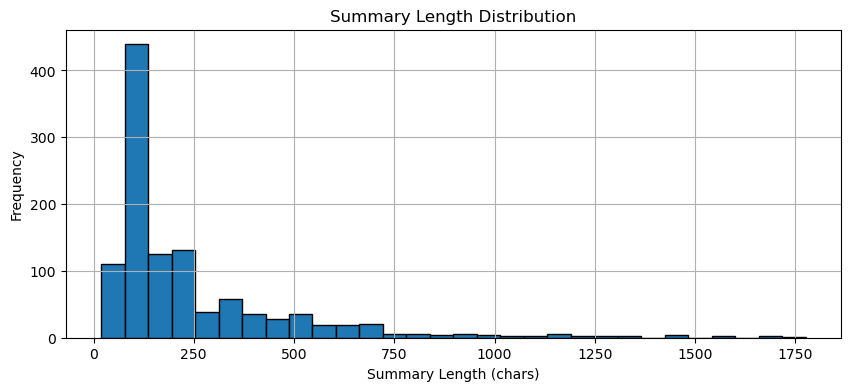

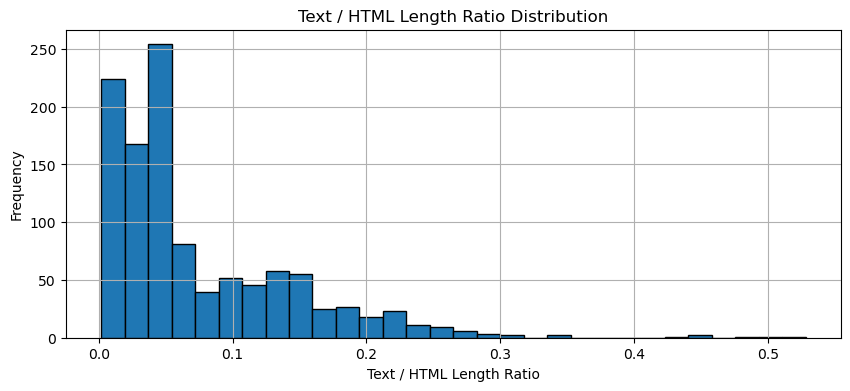

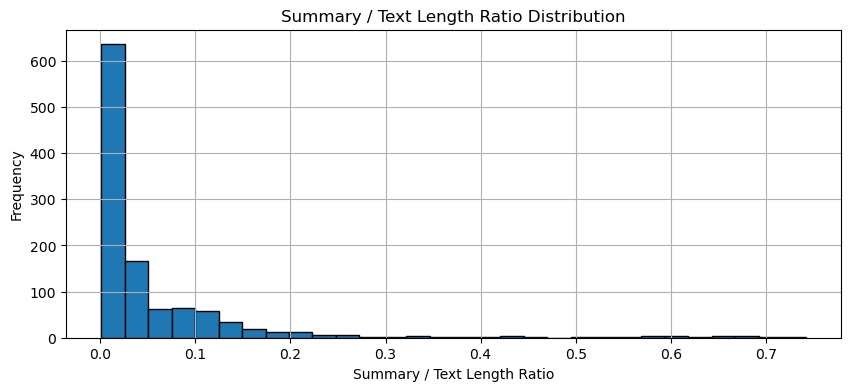

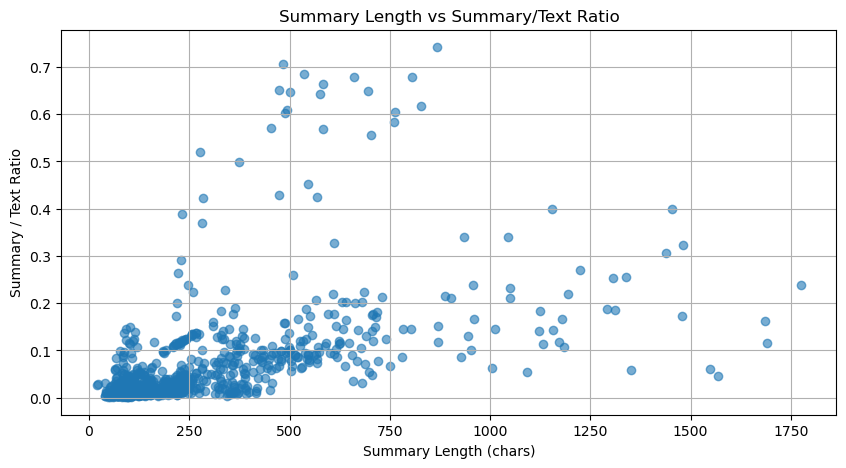

In [82]:
import matplotlib.pyplot as plt

def compare_content_sizes(articles, storage):
    results = []
    summary_lengths = []
    text_html_ratios = []
    summary_text_ratios = []

    for article in articles:
        try:
            html = storage.from_article_get_html(article) or ""
            text = storage.from_article_get_text(article) or ""
            text = extract_markdown_from_html(storage.from_article_get_html(article))
            summary = article.get("summary", "") or ""
            summary = clean_markdown(summary)
            html_len = len(html)
            text_len = len(text)
            summary_len = len(summary)
            summary_text_ratio = summary_len / text_len

            if summary_text_ratio < 0.8:
                results.append({
                    "url": article.get("url"),
                    "html_len": html_len,
                    "text_len": text_len,
                    "summary_len": summary_len,
                    "summary_text_ratio": summary_len / text_len
                })
                
                if summary_len == 1000000:
                    print(article.doc_id)
                    pprint(article)

                if summary_len > 0 and html_len > 0 and text_len > 0:
                    summary_lengths.append(summary_len)
                    text_html_ratios.append(text_len / html_len)
                    summary_text_ratios.append(summary_len / text_len)

        except Exception as e:
            print(f"⚠️ Error processing article: {article.get('url')} - {e}")

    # Print comparison table
    results.sort(key=lambda x: x["summary_text_ratio"], reverse=True)
    print(f"\n📊 Comparison of Content Sizes (top 50 by html_content length):")
    print(f"{'URL':50} | {'HTML':>6} | {'Text':>6} | {'Summary':>8}")
    print("-" * 80)
    for r in results[:50]:
        print(f"{r['url'][:50]:50} | {r['html_len']:6} | {r['text_len']:6} | {r['summary_len']:8}")

    # Plot summary length distribution
    plt.figure(figsize=(10, 4))
    plt.hist(summary_lengths, bins=30, edgecolor='black')
    plt.title("Summary Length Distribution")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot text/html ratio
    plt.figure(figsize=(10, 4))
    plt.hist(text_html_ratios, bins=30, edgecolor='black')
    plt.title("Text / HTML Length Ratio Distribution")
    plt.xlabel("Text / HTML Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Plot summary/text ratio
    plt.figure(figsize=(10, 4))
    plt.hist(summary_text_ratios, bins=30, edgecolor='black')
    plt.title("Summary / Text Length Ratio Distribution")
    plt.xlabel("Summary / Text Length Ratio")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Scatter plot: summary_length vs summary_text_ratio
    plt.figure(figsize=(10, 5))
    plt.scatter(summary_lengths, summary_text_ratios, alpha=0.6)
    plt.title("Summary Length vs Summary/Text Ratio")
    plt.xlabel("Summary Length (chars)")
    plt.ylabel("Summary / Text Ratio")
    plt.grid(True)
    plt.show()

    return results

results = compare_content_sizes(articles, storage)

In [88]:
article = storage.get_article_by_url(results[500]['url'])
text_content = storage.from_article_get_text(article)
print(article['url'])
print(len(text_content))
pprint(text_content)

https://arstechnica.com/gadgets/2025/04/nvidia-confirms-the-switch-2-supports-dlss-g-sync-and-ray-tracing/
3225
('Text settings\n'
 'Story text\n'
 'Size Small Standard Large Width\n'
 'Standard Wide Links Standard Orange\n'
 'Subscribers only \n'
 'Learn more\n'
 'Minimize to nav\n'
 'In the wake of the Switch 2 reveal, neither Nintendo nor Nvidia has gone '
 'into any detail at all about the exact chip inside the upcoming '
 'handheld—technically, we are still not sure what Arm CPU architecture or '
 'what GPU architecture it uses, how much RAM we can expect it to have, how '
 "fast that memory will be, or exactly how many graphics cores we're looking "
 'at.\n'
 'But interviews with Nintendo executives and a blog post from Nvidia did at '
 'least confirm several of the new chip\'s capabilities. The "custom Nvidia '
 'processor" has a GPU "with dedicated [Ray-Tracing] Cores and Tensor Cores '
 'for stunning visuals and AI-driven enhancements," writes Nvidia Software '
 'Engineering V

In [ ]:
SUMMARY_PROMPT = '''You are a professional summarizer in an automated newsletter system.

Your task is to summarize the following article in **fewer than 250 words**. The summary must be **as concise and information-dense as possible**, while preserving all **essential facts, arguments, conclusions, and relevant keywords**.

Avoid: redundancy, filler phrases, vague language, or speculative commentary.  
Do: use clear, direct language and complete sentences. Maintain a **neutral and factual tone**.

ARTICLE: """
{text_content}
"""
'''

1314


## TAGs analysis

In [141]:
from collections import Counter

def count_all_tags(articles):
    tag_counter = Counter()
    for article in articles:
        tags = article.get("tags", [])
        if isinstance(tags, list):
            tag_counter.update(tags)
    return tag_counter

# Run and display
tag_counts = count_all_tags(articles)
print("There are ", len(tag_counts), "different tags :")
print("\n🏷️ Most Common Tags:")
for tag, count in tag_counts.most_common(100):  # change number to see more
    print(f"{tag:20} : {count}")

There are  1565 different tags :

🏷️ Most Common Tags:
NLP                  : 65
LLMs                 : 64
Data Development     : 63
Foundation Models    : 57
Fine-Tuning          : 52
AI                   : 48
Data Labeling        : 42
World news           : 40
Applied AI           : 40
Artificial Intelligence : 39
Data-Centric AI      : 35
Data development     : 33
Business             : 32
UK news              : 32
NEWS                 : 30
US news              : 29
Evaluation           : 29
Research             : 28
Machine Learning     : 26
The-Latest           : 24
Donald Trump         : 23
Product              : 23
Alignment            : 22
News                 : 20
AI News              : 20
Security             : 19
Culture              : 19
GamesBeat            : 19
Trump tariffs        : 18
RAG                  : 18
Technology           : 17
Trump administration : 16
Product Releases     : 16
Nintendo             : 15
Environment          : 15
Life and style       : 15
Tariff

## Basic experiments

In [13]:
model_dict = storage.get_model_by_name("deepseek-r1-distill-qwen-32b:free")
pprint(model_dict)

{'config': {'openai': {'api_key_env_var': 'OPEN_ROUTER_API_KEY',
                       'base_url': 'https://openrouter.ai/api/v1',
                       'model': 'deepseek/deepseek-r1-distill-qwen-32b:free',
                       'n': 1,
                       'temperature': 0}},
 'created_at': '2025-04-01T20:03:35.982601',
 'input_format': 'text_content',
 'last_updated': '2025-04-02T17:19:03.810618',
 'name': 'deepseek-r1-distill-qwen-32b:free',
 'output_format': 'summary',
 'version': '2025-01-29'}
